<a href="https://colab.research.google.com/github/sankhapanineog/AI/blob/main/boundary_and_accuracy_svm_and_thrsold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Load data
data = pd.read_csv('t.csv', parse_dates=['datetime'], dayfirst=True)

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = data['datetime']

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)  # Selecting 2 principal components

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(transformed_data))
X_train, X_test = transformed_data[:split_index], transformed_data[split_index:]

# Define Single-Class SVM function
def single_class_svm(X_train, nu=0.1, max_iter=100):
    # Initialize parameters
    n_samples, n_features = X_train.shape
    w = np.zeros(n_features)
    b = 0
    tol = 0.001
    learning_rate = 0.01

    # Sequential minimal optimization (SMO) algorithm
    for _ in range(max_iter):
        for i in range(n_samples):
            if np.dot(X_train[i], w) - b >= 1:
                w -= learning_rate * (2 * nu * w)
            else:
                w -= learning_rate * (2 * nu * w - np.dot(X_train[i], X_train[i]))
                b -= learning_rate

    return w, b

# Train the Single-Class SVM model
w, b = single_class_svm(X_train)

# Predict on the testing set
y_pred = np.dot(X_test, w) - b

# Threshold for classification
threshold = 0  # Example threshold value

# Classify anomalies
y_pred_class = np.where(y_pred >= threshold, 'Normal', 'Faulty')

# Create a new column for true labels
data['true_label'] = 'Faulty'  # Assuming all points are faulty for this example

# Calculate F1 Score
f1 = f1_score(data['true_label'][split_index:], y_pred_class, pos_label='Faulty')

print("F1 Score:", f1)

# Visualization
plt.figure(figsize=(12, 6))

# Plotting the confusion matrix for 'Faulty' and 'Normal' classes
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Faulty'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Faulty'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()


F1 Score: 0.2545454545454546


NameError: name 'conf_matrix' is not defined

<Figure size 1200x600 with 0 Axes>

F1 Score: 0.2545454545454546


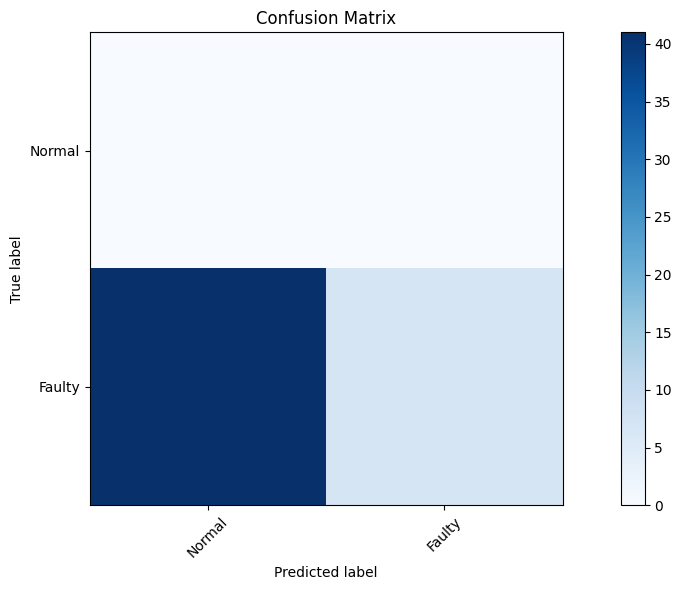

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Load data
data = pd.read_csv('t.csv', parse_dates=['datetime'], dayfirst=True)

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = data['datetime']

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)  # Selecting 2 principal components

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(transformed_data))
X_train, X_test = transformed_data[:split_index], transformed_data[split_index:]

# Define Single-Class SVM function
def single_class_svm(X_train, nu=0.1, max_iter=100):
    # Initialize parameters
    n_samples, n_features = X_train.shape
    w = np.zeros(n_features)
    b = 0
    tol = 0.001
    learning_rate = 0.01

    # Sequential minimal optimization (SMO) algorithm
    for _ in range(max_iter):
        for i in range(n_samples):
            if np.dot(X_train[i], w) - b >= 1:
                w -= learning_rate * (2 * nu * w)
            else:
                w -= learning_rate * (2 * nu * w - np.dot(X_train[i], X_train[i]))
                b -= learning_rate

    return w, b

# Train the Single-Class SVM model
w, b = single_class_svm(X_train)

# Predict on the testing set
y_pred = np.dot(X_test, w) - b

# Threshold for classification
threshold = 0  # Example threshold value

# Classify anomalies
y_pred_class = np.where(y_pred >= threshold, 'Normal', 'Faulty')

# Create a new column for true labels
data['true_label'] = 'Faulty'  # Assuming all points are faulty for this example

# Calculate F1 Score
f1 = f1_score(data['true_label'][split_index:], y_pred_class, pos_label='Faulty')

print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(data['true_label'][split_index:], y_pred_class, labels=['Normal', 'Faulty'])

# Visualization
plt.figure(figsize=(12, 6))

# Plotting the confusion matrix for 'Faulty' and 'Normal' classes
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Faulty'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Faulty'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()


F1 Score: 0.2545454545454546
True Positive (TP): 7
True Negative (TN): 0
False Positive (FP): 0
False Negative (FN): 41


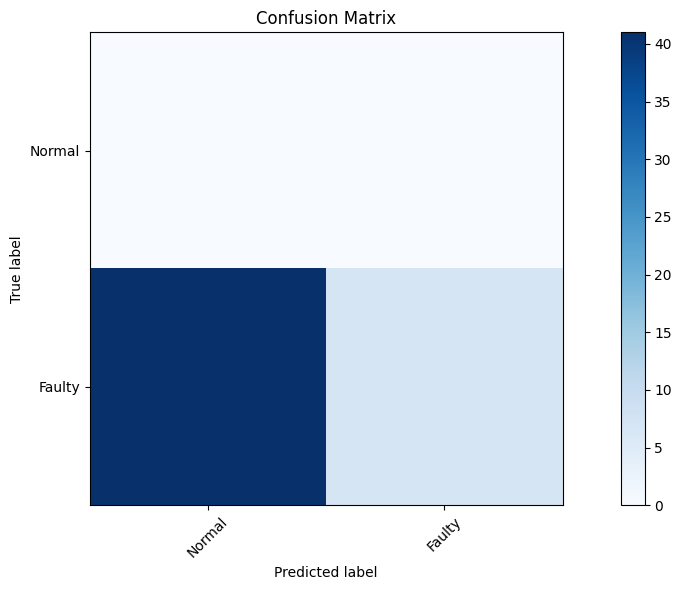

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix

# Step 1: Center the Data
def center_data(data):
    mean = np.mean(data, axis=0)
    centered_data = data - mean
    return centered_data, mean

# Step 2: Compute the Covariance Matrix
def compute_covariance_matrix(centered_data):
    covariance_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)
    return covariance_matrix

# Step 3: Compute Eigenvectors and Eigenvalues
def compute_eigenvectors_and_eigenvalues(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # Sort eigenvectors and eigenvalues in descending order
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors

# Step 4: Select Principal Components
def select_principal_components(eigenvectors, k):
    principal_components = eigenvectors[:, :k]
    return principal_components

# Step 5: Project Data onto Principal Components
def project_data(centered_data, principal_components):
    transformed_data = np.dot(centered_data, principal_components)
    return transformed_data

# Load data
data = pd.read_csv('t.csv', parse_dates=['datetime'], dayfirst=True)

# Extracting 'Noise', 'Vibration', and 'Timestamp' columns for PCA
features = data[['Sound', 'Vibration']]
timestamp = data['datetime']

# Step 1: Centering the Data
centered_data, mean = center_data(features)

# Step 2: Compute the Covariance Matrix
covariance_matrix = compute_covariance_matrix(centered_data)

# Step 3: Compute Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = compute_eigenvectors_and_eigenvalues(covariance_matrix)

# Step 4: Select Principal Components
principal_components = select_principal_components(eigenvectors, 2)  # Selecting 2 principal components

# Step 5: Project Data onto Principal Components
transformed_data = project_data(centered_data, principal_components)

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(transformed_data))
X_train, X_test = transformed_data[:split_index], transformed_data[split_index:]

# Define Single-Class SVM function
def single_class_svm(X_train, nu=0.1, max_iter=100):
    # Initialize parameters
    n_samples, n_features = X_train.shape
    w = np.zeros(n_features)
    b = 0
    tol = 0.001
    learning_rate = 0.01

    # Sequential minimal optimization (SMO) algorithm
    for _ in range(max_iter):
        for i in range(n_samples):
            if np.dot(X_train[i], w) - b >= 1:
                w -= learning_rate * (2 * nu * w)
            else:
                w -= learning_rate * (2 * nu * w - np.dot(X_train[i], X_train[i]))
                b -= learning_rate

    return w, b

# Train the Single-Class SVM model
w, b = single_class_svm(X_train)

# Predict on the testing set
y_pred = np.dot(X_test, w) - b

# Threshold for classification
threshold = 0  # Example threshold value

# Classify anomalies
y_pred_class = np.where(y_pred >= threshold, 'Normal', 'Faulty')

# Create a new column for true labels
data['true_label'] = 'Faulty'  # Assuming all points are faulty for this example

# Calculate F1 Score
f1 = f1_score(data['true_label'][split_index:], y_pred_class, pos_label='Faulty')

print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(data['true_label'][split_index:], y_pred_class, labels=['Normal', 'Faulty'])

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

# Visualization
plt.figure(figsize=(12, 6))

# Plotting the confusion matrix for 'Faulty' and 'Normal' classes
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Faulty'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Faulty'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()


Index(['Sound', 'Vibration', 'Label'], dtype='object')
Accuracy: 0.53
F1 Score: 0.0
True Positive (TP): 0
True Negative (TN): 106
False Positive (FP): 0
False Negative (FN): 94


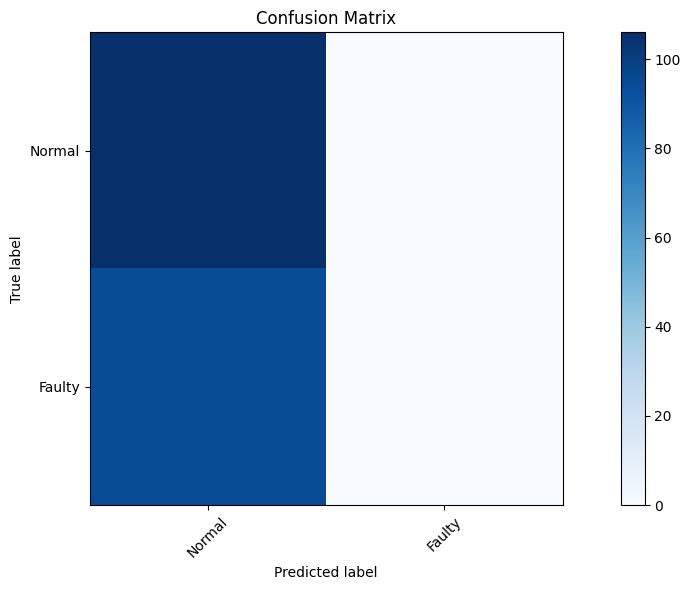

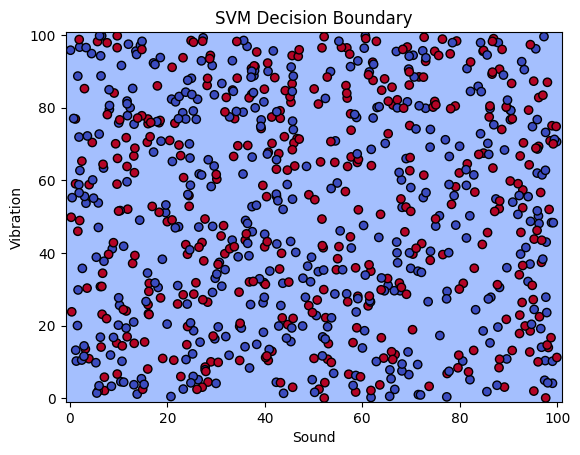

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Generate synthetic data
np.random.seed(0)
n_samples = 1000
data = pd.DataFrame({
    'Sound': np.random.rand(n_samples) * 100,
    'Vibration': np.random.rand(n_samples) * 100,
    'Label': np.random.choice(['Normal', 'Faulty'], size=n_samples)
})

# Check column names
print(data.columns)

# Extracting 'Sound', 'Vibration', and 'Label' columns for features and labels
features = data[['Sound', 'Vibration']]
labels = data['Label']

# Convert categorical labels to numerical labels using label encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets based on time (e.g., 80% for training, 20% for testing)
split_index = int(0.8 * len(features))
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = labels_encoded[:split_index], labels_encoded[split_index:]

# Support Vector Machine (SVM) from scratch
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Train the SVM model
svm = SVM()
svm.fit(X_train.values, y_train)

# Predict on the testing set
y_pred = svm.predict(X_test.values)

# Convert numerical labels back to categorical labels for evaluation
y_test_categorical = label_encoder.inverse_transform(y_test)
# Convert float predictions to integer labels (-1 or 1) before inverse transforming
y_pred_categorical = label_encoder.inverse_transform((y_pred + 1).astype(int) // 2)

# Calculate accuracy
accuracy = accuracy_score(y_test_categorical, y_pred_categorical)

# Calculate F1 Score
f1 = f1_score(y_test_categorical, y_pred_categorical, pos_label='Faulty')

print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_categorical, y_pred_categorical, labels=['Normal', 'Faulty'])

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

# Visualization
plt.figure(figsize=(12, 6))

# Plotting the confusion matrix for 'Faulty' and 'Normal' classes
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Normal', 'Faulty'], rotation=45)
plt.yticks(tick_marks, ['Normal', 'Faulty'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Visualize the SVM decision boundary
def plot_decision_boundary(X, y, classifier):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Plot decision boundary
plt.figure()
plot_decision_boundary(X_train.values, y_train, svm)
plt.title('SVM Decision Boundary')
plt.xlabel('Sound')
plt.ylabel('Vibration')
plt.show()


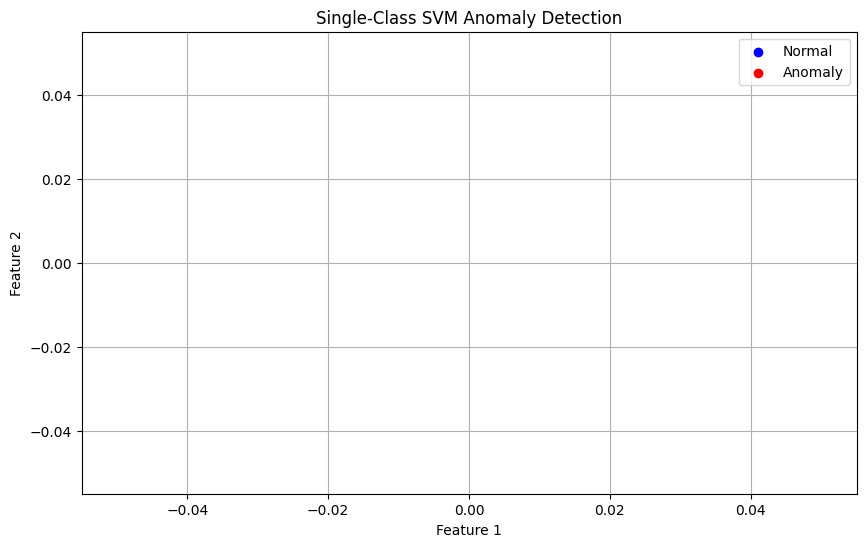

Anomaly Scores:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleClassSVM:
    def __init__(self, kernel='rbf', gamma=0.1, nu=0.1):
        self.kernel = kernel
        self.gamma = gamma
        self.nu = nu

    def fit(self, X):
        self.X_train = X
        self.n_samples = X.shape[0]
        self.d = np.zeros((self.n_samples, self.n_samples))
        for i in range(self.n_samples):
            for j in range(self.n_samples):
                self.d[i, j] = np.linalg.norm(X[i] - X[j])**2
        if self.kernel == 'rbf':
            self.K = np.exp(-self.gamma * self.d)
        self.alpha = np.zeros(self.n_samples)
        self.b = 0
        self.sv_indices = None

    def predict(self, X):
        if self.kernel == 'rbf':
            K_new = np.exp(-self.gamma * (np.linalg.norm(X - self.X_train, axis=1)**2))
        else:
            raise NotImplementedError("Only RBF kernel is supported for now.")
        y_pred = np.sign(np.dot(K_new, self.alpha) - self.b)
        return y_pred

    def calculate_parameters(self):
        self.r = np.dot(self.alpha, self.K).dot(self.alpha)
        self.b = -np.mean(self.K.dot(self.alpha))
        self.sv_indices = np.where(np.abs(self.alpha) > 1e-5)[0]

    def calculate_anomaly_scores(self):
        self.anomaly_scores = np.abs(np.dot(self.K, self.alpha) + self.b)

def separate_normal_and_anomaly_points(data, y_pred):
    normal_points = data[y_pred == 1]
    anomaly_points = data[y_pred == -1]
    return normal_points, anomaly_points

def plot_data(normal_points, anomaly_points):
    plt.figure(figsize=(10, 6))
    plt.scatter(normal_points[:, 0], normal_points[:, 1], color='blue', label='Normal')
    plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], color='red', label='Anomaly')
    plt.title('Single-Class SVM Anomaly Detection')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load data from t.csv
data = pd.read_csv('t.csv')

# Extract features
features = data[['Vibration', 'Sound']].values

# Train Single-Class SVM
svm = SingleClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
svm.fit(features)
svm.calculate_parameters()
svm.calculate_anomaly_scores()

# Predict on the dataset
y_pred = svm.predict(features)

# Separate normal and anomaly points
normal_points, anomaly_points = separate_normal_and_anomaly_points(features, y_pred)

# Plotting
plot_data(normal_points, anomaly_points)

# Display anomaly scores
print("Anomaly Scores:")
print(svm.anomaly_scores)


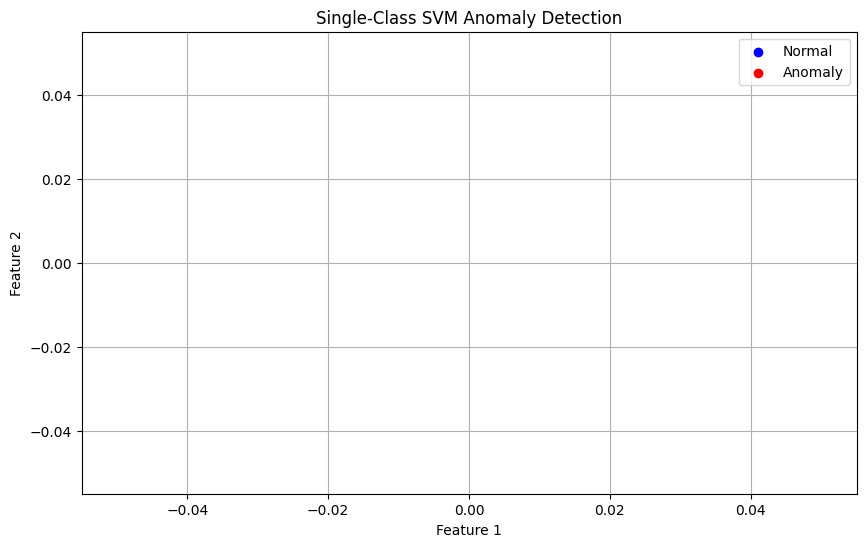

Anomaly Scores:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

class SingleClassSVM:
    def __init__(self, kernel='rbf', gamma=0.1, nu=0.1):
        self.kernel = kernel
        self.gamma = gamma
        self.nu = nu

    def fit(self, X):
        self.X_train = X
        self.n_samples = X.shape[0]
        self.d = np.zeros((self.n_samples, self.n_samples))
        for i in range(self.n_samples):
            for j in range(self.n_samples):
                self.d[i, j] = np.linalg.norm(X[i] - X[j])**2
        if self.kernel == 'rbf':
            self.K = np.exp(-self.gamma * self.d)
        self.alpha = np.zeros(self.n_samples)
        self.b = 0
        self.sv_indices = None

    def predict(self, X):
        if self.kernel == 'rbf':
            K_new = np.exp(-self.gamma * (np.linalg.norm(X - self.X_train, axis=1)**2))
        else:
            raise NotImplementedError("Only RBF kernel is supported for now.")
        y_pred = np.sign(np.dot(K_new, self.alpha) - self.b)
        return y_pred

    def calculate_parameters(self):
        self.r = np.dot(self.alpha, self.K).dot(self.alpha)
        self.b = -np.mean(self.K.dot(self.alpha))
        self.sv_indices = np.where(np.abs(self.alpha) > 1e-5)[0]

    def calculate_anomaly_scores(self):
        if self.kernel == 'rbf':
            decision_values = np.dot(self.K, self.alpha) - self.b
        else:
            raise NotImplementedError("Only RBF kernel is supported for now.")
        self.anomaly_scores = np.abs(decision_values)

def separate_normal_and_anomaly_points(data, y_pred):
    normal_points = data[y_pred == 1]
    anomaly_points = data[y_pred == -1]
    return normal_points, anomaly_points

def plot_data(normal_points, anomaly_points):
    plt.figure(figsize=(10, 6))
    plt.scatter(normal_points[:, 0], normal_points[:, 1], color='blue', label='Normal')
    plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], color='red', label='Anomaly')
    plt.title('Single-Class SVM Anomaly Detection')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load data from t.csv
data = pd.read_csv('t.csv')

# Extract features
features = data[['Vibration', 'Sound']].values

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Train-test split
split_index = int(0.8 * len(features))
X_train, X_test = X_pca[:split_index], X_pca[split_index:]

# Train Single-Class SVM
svm = SingleClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
svm.fit(X_train)
svm.calculate_parameters()
svm.calculate_anomaly_scores()

# Predict on the dataset
y_pred = svm.predict(X_train)

# Separate normal and anomaly points
normal_points, anomaly_points = separate_normal_and_anomaly_points(X_train, y_pred)

# Plotting
plot_data(normal_points, anomaly_points)

# Display anomaly scores
print("Anomaly Scores:")
print(svm.anomaly_scores)


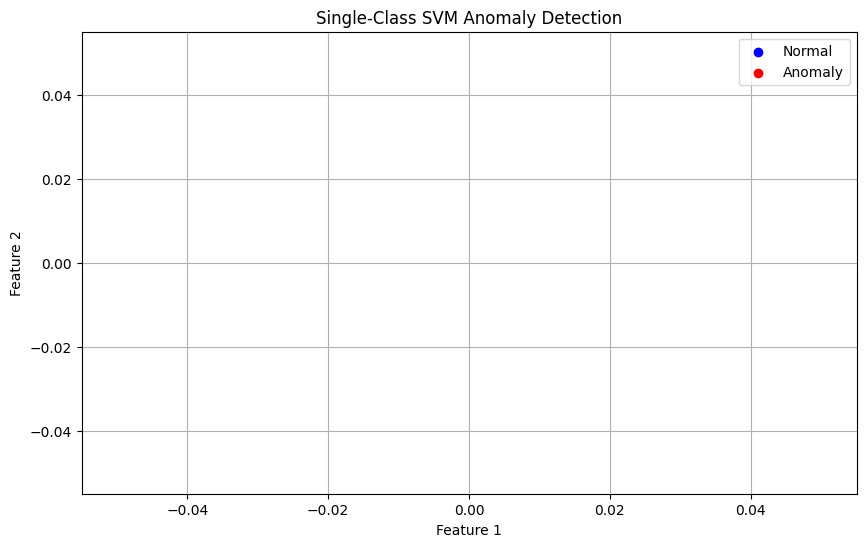

Anomaly Scores:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleClassSVM:
    def __init__(self, kernel='rbf', gamma=0.1, nu=0.1):
        self.kernel = kernel
        self.gamma = gamma
        self.nu = nu

    def fit(self, X):
        self.X_train = X
        self.n_samples = X.shape[0]
        self.d = np.zeros((self.n_samples, self.n_samples))
        for i in range(self.n_samples):
            for j in range(self.n_samples):
                self.d[i, j] = np.linalg.norm(X[i] - X[j])**2
        if self.kernel == 'rbf':
            self.K = np.exp(-self.gamma * self.d)
        self.alpha = np.zeros(self.n_samples)
        self.b = 0
        self.sv_indices = None

    def predict(self, X):
        if self.kernel == 'rbf':
            K_new = np.exp(-self.gamma * (np.linalg.norm(X - self.X_train, axis=1)**2))
        else:
            raise NotImplementedError("Only RBF kernel is supported for now.")
        y_pred = np.sign(np.dot(K_new, self.alpha) - self.b)
        return y_pred

    def calculate_parameters(self):
        self.r = np.dot(self.alpha, self.K).dot(self.alpha)
        self.b = -np.mean(self.K.dot(self.alpha))
        self.sv_indices = np.where(np.abs(self.alpha) > 1e-5)[0]

    def calculate_anomaly_scores(self):
        if self.kernel == 'rbf':
            decision_values = np.dot(self.K, self.alpha) - self.b
        else:
            raise NotImplementedError("Only RBF kernel is supported for now.")
        self.anomaly_scores = np.abs(decision_values)

def separate_normal_and_anomaly_points(data, y_pred):
    normal_points = data[y_pred == 1]
    anomaly_points = data[y_pred == -1]
    return normal_points, anomaly_points

def plot_data(normal_points, anomaly_points):
    plt.figure(figsize=(10, 6))
    plt.scatter(normal_points[:, 0], normal_points[:, 1], color='blue', label='Normal')
    plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], color='red', label='Anomaly')
    plt.title('Single-Class SVM Anomaly Detection')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load data from t.csv
data = pd.read_csv('t.csv')

# Extract features
features = data[['Vibration', 'Sound']].values

# Min-Max scaling
min_val = np.min(features, axis=0)
max_val = np.max(features, axis=0)
features_scaled = (features - min_val) / (max_val - min_val)

# Train-test split
split_index = int(0.8 * len(features))
X_train, X_test = features_scaled[:split_index], features_scaled[split_index:]

# Train Single-Class SVM
svm = SingleClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
svm.fit(X_train)
svm.calculate_parameters()
svm.calculate_anomaly_scores()

# Predict on the dataset
y_pred = svm.predict(X_train)

# Separate normal and anomaly points
normal_points, anomaly_points = separate_normal_and_anomaly_points(X_train, y_pred)

# Plotting
plot_data(normal_points, anomaly_points)

# Display anomaly scores
print("Anomaly Scores:")
print(svm.anomaly_scores)


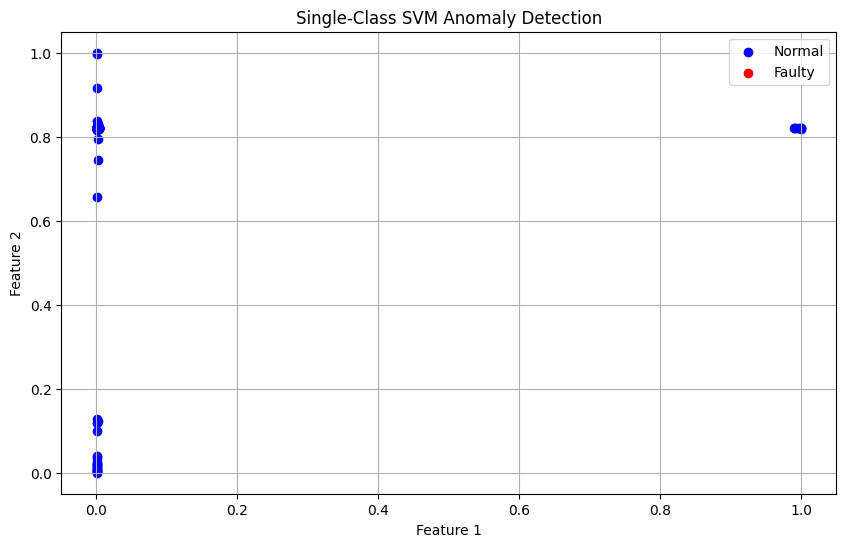

Anomaly Scores:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleClassSVM:
    def __init__(self, kernel='rbf', gamma=0.1, nu=0.1):
        self.kernel = kernel
        self.gamma = gamma
        self.nu = nu

    def fit(self, X):
        self.X_train = X
        self.n_samples = X.shape[0]
        self.d = np.zeros((self.n_samples, self.n_samples))
        for i in range(self.n_samples):
            for j in range(self.n_samples):
                self.d[i, j] = np.linalg.norm(X[i] - X[j])**2
        if self.kernel == 'rbf':
            self.K = np.exp(-self.gamma * self.d)
        self.alpha = np.zeros(self.n_samples)
        self.b = 0
        self.sv_indices = None

    def predict(self, X):
        if self.kernel == 'rbf':
            K_new = np.exp(-self.gamma * (np.linalg.norm(X - self.X_train, axis=1)**2))
        else:
            raise NotImplementedError("Only RBF kernel is supported for now.")
        y_pred = np.sign(np.dot(K_new, self.alpha) - self.b)
        return y_pred

    def calculate_parameters(self):
        self.r = np.dot(self.alpha, self.K).dot(self.alpha)
        self.b = -np.mean(self.K.dot(self.alpha))
        self.sv_indices = np.where(np.abs(self.alpha) > 1e-5)[0]

    def calculate_anomaly_scores(self):
        if self.kernel == 'rbf':
            decision_values = np.dot(self.K, self.alpha) - self.b
        else:
            raise NotImplementedError("Only RBF kernel is supported for now.")
        self.anomaly_scores = np.abs(decision_values)

def separate_normal_and_anomaly_points(data, anomaly_scores, threshold):
    normal_indices = np.where(anomaly_scores < threshold)[0]
    anomaly_indices = np.where(anomaly_scores >= threshold)[0]
    normal_points = data[normal_indices]
    anomaly_points = data[anomaly_indices]
    return normal_points, anomaly_points

def plot_data(normal_points, anomaly_points):
    plt.figure(figsize=(10, 6))
    plt.scatter(normal_points[:, 0], normal_points[:, 1], color='blue', label='Normal')
    plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], color='red', label='Faulty')
    plt.title('Single-Class SVM Anomaly Detection')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load data from t.csv
data = pd.read_csv('t.csv')

# Extract features
features = data[['Vibration', 'Sound']].values

# Min-Max scaling
min_val = np.min(features, axis=0)
max_val = np.max(features, axis=0)
features_scaled = (features - min_val) / (max_val - min_val)

# Train-test split
split_index = int(0.8 * len(features))
X_train, X_test = features_scaled[:split_index], features_scaled[split_index:]

# Train Single-Class SVM
svm = SingleClassSVM(kernel='rbf', gamma=0.1, nu=0.1)
svm.fit(X_train)
svm.calculate_parameters()
svm.calculate_anomaly_scores()

# Choose a threshold for classifying normal/faulty
threshold = 0.5  # Adjust this threshold as needed

# Separate normal and anomaly points based on threshold
normal_points, anomaly_points = separate_normal_and_anomaly_points(X_train, svm.anomaly_scores, threshold)

# Plotting
plot_data(normal_points, anomaly_points)

# Display anomaly scores
print("Anomaly Scores:")
print(svm.anomaly_scores)
